In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import squarify 

C:\Users\zoran\AppData\Local\Temp\ipykernel_5100\2138232034.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(cleaned_labels)


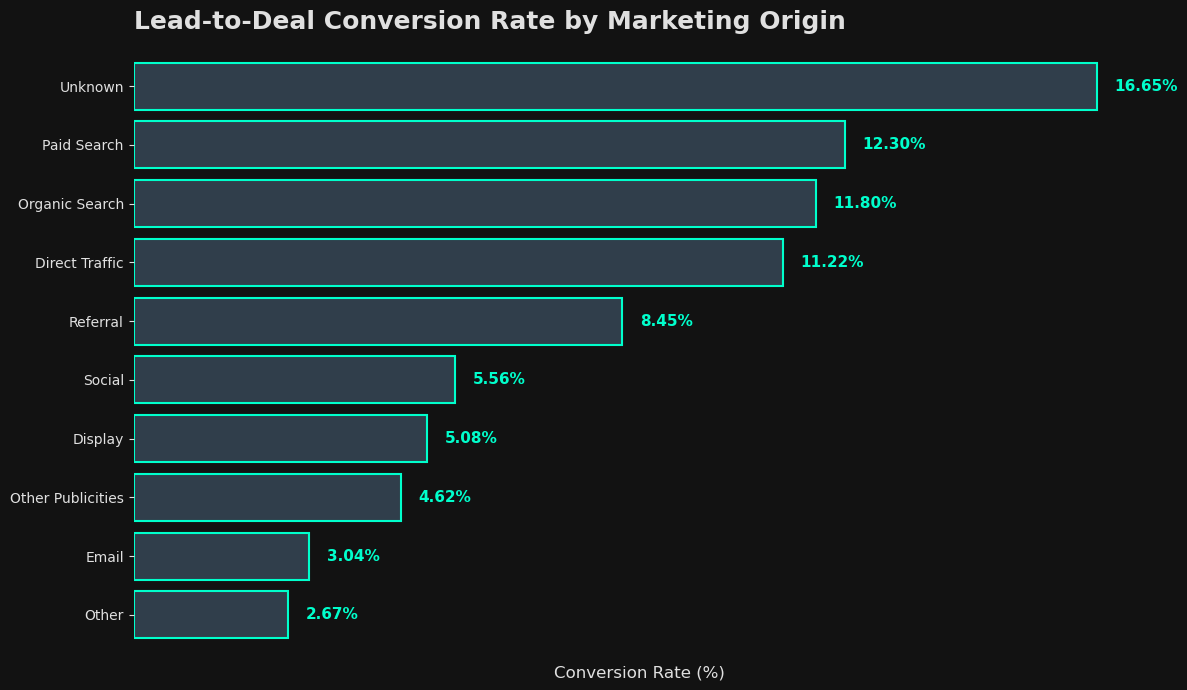

In [2]:
# --- 1. Data Preparation ---
data = {
    'origin': [
        'unknown', 'paid_search', 'organic_search', 'direct_traffic', 
        'referral', 'social', 'display', 'other_publicities', 'email', 'other'
    ],
    'conversion_rate_pct': [
        16.65, 12.30, 11.80, 11.22, 8.45, 5.56, 5.08, 4.62, 3.04, 2.67
    ]
}
df_viz = pd.DataFrame(data)

# --- 2. Modern Dark Theme Setup ---
dark_bg = "#121212"
text_color = "#E0E0E0" 

plt.rcParams['figure.facecolor'] = dark_bg
plt.rcParams['axes.facecolor'] = dark_bg
plt.rcParams['axes.labelcolor'] = text_color
plt.rcParams['xtick.color'] = text_color
plt.rcParams['ytick.color'] = text_color
plt.rcParams['text.color'] = text_color
plt.rcParams['axes.grid'] = False

# --- 3. Create the Modern Horizontal Bar Chart ---
fig, ax = plt.subplots(figsize=(12, 7))

sns.barplot(
    data=df_viz,
    x='conversion_rate_pct',
    y='origin',
    color='#2b3e50',  # Standardized Deep Slate
    ax=ax,
    edgecolor='#00ffcc', # Electric Cyan border to make it pop
    linewidth=1.5
)

# --- 4. Modern Styling Touches ---
sns.despine(left=True, bottom=True)

# 1. Clean up the Y-axis labels (paid_search -> Paid Search)
cleaned_labels = [label.get_text().replace('_', ' ').title() for label in ax.get_yticklabels()]
ax.set_yticklabels(cleaned_labels)

# 2. Add Data Labels directly to the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 0.3,       
        p.get_y() + p.get_height() / 2, 
        f'{width:.2f}%',   
        ha='left', va='center', 
        color='#00ffcc', 
        fontweight='bold', fontsize=11
    )

ax.set_xlabel("Conversion Rate (%)", fontsize=12, labelpad=15, fontweight='medium')
ax.set_ylabel("", fontsize=12) 
ax.set_title(
    "Lead-to-Deal Conversion Rate by Marketing Origin", 
    fontsize=18, fontweight='bold', pad=20, loc='left'
)

ax.set_xticks([])
plt.tight_layout()
plt.show()

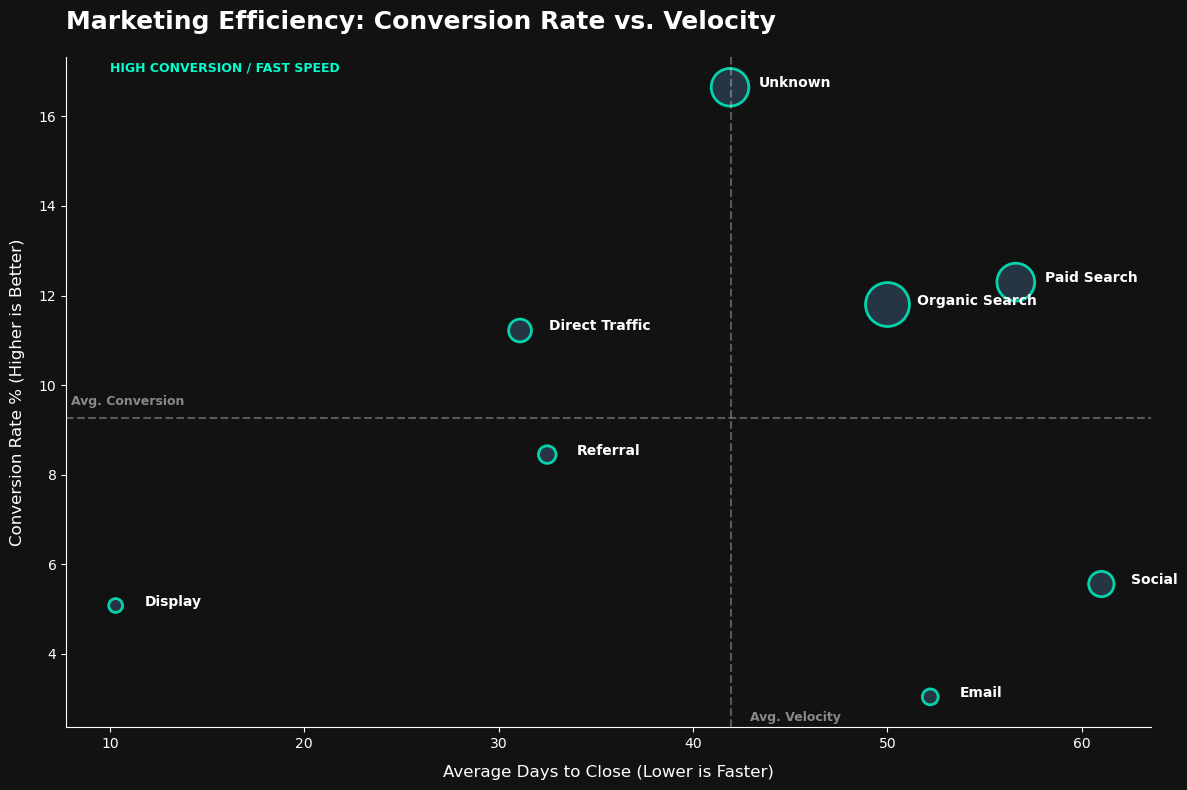

In [3]:
# --- 1. Combine Data from Q1 and Q2 ---
# We are creating a "Performance Matrix"
matrix_data = {
    'origin': ['display', 'direct_traffic', 'referral', 'unknown', 'organic_search', 'email', 'paid_search', 'social'],
    'conv_rate': [5.08, 11.22, 8.45, 16.65, 11.80, 3.04, 12.30, 5.56],
    'avg_days': [10.3, 31.1, 32.5, 41.9, 50.0, 52.2, 56.6, 61.0],
    'closed_deals': [6, 56, 24, 193, 271, 15, 195, 75]
}
df_matrix = pd.DataFrame(matrix_data)

# --- 2. Setup Dark Plot ---
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#121212')
ax.set_facecolor('#121212')

# --- 3. Create Scatter Plot ---
# Size of circles (s) represents the number of deals (volume)
scatter = sns.scatterplot(
    data=df_matrix,
    x='avg_days',
    y='conv_rate',
    size='closed_deals',
    sizes=(100, 1000),
    color='#2b3e50',     # Base color for bubbles
    edgecolor='#00ffcc', # Electric Cyan ring
    linewidth=2,
    alpha=0.8,
    legend=False
)

# --- 4. Annotate each point ---
for i in range(df_matrix.shape[0]):
    plt.text(
        df_matrix.avg_days[i] + 1.5, 
        df_matrix.conv_rate[i], 
        df_matrix.origin[i].replace('_', ' ').title(),
        color='white', fontsize=10, fontweight='bold'
    )

# --- 5. Add "Quadrant" Lines (Modern Analysis Technique) ---
plt.axhline(y=df_matrix.conv_rate.mean(), color='white', linestyle='--', alpha=0.3)
plt.axvline(x=df_matrix.avg_days.mean(), color='white', linestyle='--', alpha=0.3)

plt.text(df_matrix.avg_days.mean() + 1, 2.5, "Avg. Velocity", color='white', alpha=0.5, fontsize=9, fontweight='bold')
plt.text(8, df_matrix.conv_rate.mean() + 0.3, "Avg. Conversion", color='white', alpha=0.5, fontsize=9, fontweight='bold')

# Label the "Sweet Spot"
plt.text(10, 17, "HIGH CONVERSION / FAST SPEED", color='#00ffcc', fontsize=9, fontweight='bold')

# Styling
ax.set_title("Marketing Efficiency: Conversion Rate vs. Velocity", fontsize=18, pad=20, loc='left', fontweight='bold')
ax.set_xlabel("Average Days to Close (Lower is Faster)", fontsize=12, labelpad=10)
ax.set_ylabel("Conversion Rate % (Higher is Better)", fontsize=12, labelpad=10)
sns.despine()

plt.tight_layout()
plt.show()

C:\Users\zoran\AppData\Local\Temp\ipykernel_5100\1766100307.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([x.replace('_', ' ').title() for x in df_rev['origin']], rotation=15, color='white')


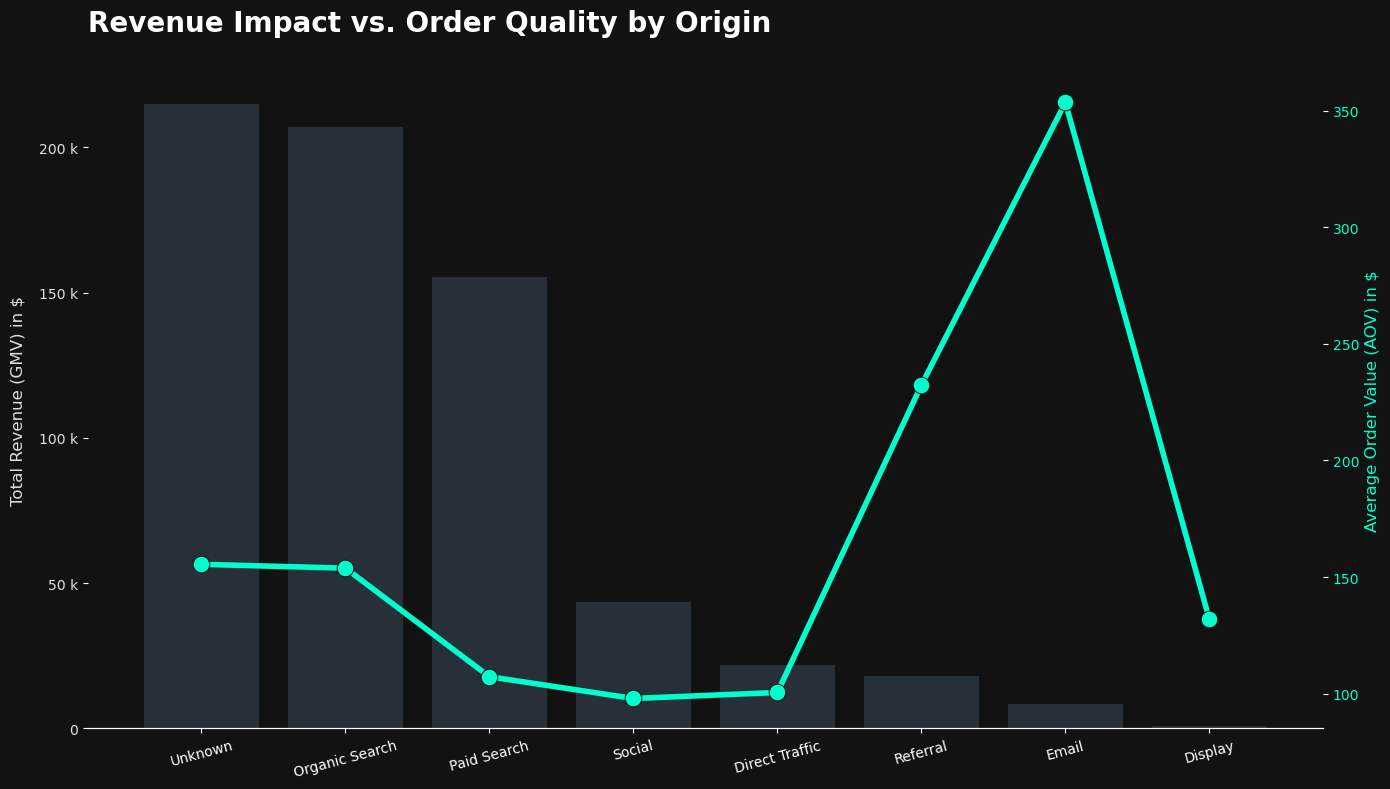

In [4]:


# --- 1. Prepare Data ---
revenue_data = {
    'origin': ['unknown', 'organic_search', 'paid_search', 'social', 'direct_traffic', 'referral', 'email', 'display'],
    'gmv': [214985.30, 207023.45, 155277.05, 43477.99, 21903.90, 17887.15, 8484.99, 923.00],
    'aov': [155.45, 153.81, 107.24, 97.92, 100.48, 232.30, 353.54, 131.86]
}
df_rev = pd.DataFrame(revenue_data)

# --- 2. Setup Plot ---
fig, ax1 = plt.subplots(figsize=(14, 8), facecolor='#121212')
ax1.set_facecolor('#121212')

# --- 3. Bar Chart (GMV) ---
bar = sns.barplot(data=df_rev, x='origin', y='gmv', color='#2b3e50', ax=ax1, alpha=0.7)

ax1.set_ylabel("Total Revenue (GMV) in $", color='#E0E0E0', fontsize=12, labelpad=10)
ax1.tick_params(axis='y', labelcolor='#E0E0E0')

# Format Y-axis to show thousands (K)
ax1.yaxis.set_major_formatter(ticker.EngFormatter())

# --- 4. Line Chart (AOV) on Secondary Axis ---
ax2 = ax1.twinx()

sns.lineplot(
    data=df_rev, x='origin', y='aov', 
    color='#00ffcc', # Electric Cyan Line
    marker='o', linewidth=4, markersize=12, 
    markeredgecolor='#121212', # Adds a clean gap between marker and line
    ax=ax2
)
ax2.set_ylabel("Average Order Value (AOV) in $", color='#00ffcc', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#00ffcc')


ax2.grid(False) # Ensure no grid lines for the secondary axis

# --- 5. Styling ---
ax1.set_title("Revenue Impact vs. Order Quality by Origin", fontsize=20, fontweight='bold', color='white', pad=30, loc='left')
ax1.set_xlabel("")
ax1.set_xticklabels([x.replace('_', ' ').title() for x in df_rev['origin']], rotation=15, color='white')

# Remove spines
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

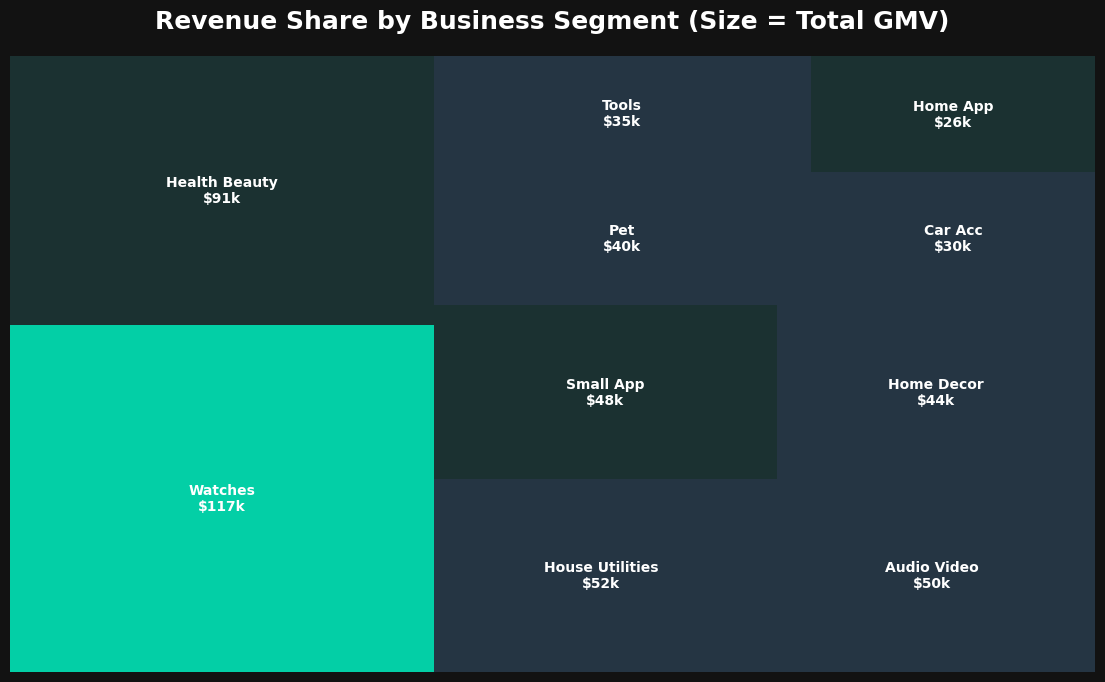

In [5]:
# --- 1. Prepare Data ---
segment_data = {
    'segment': ['Watches', 'Health Beauty', 'House Utilities', 'Audio Video', 'Small App', 'Home Decor', 'Pet', 'Tools', 'Car Acc', 'Home App'],
    'gmv': [117278.87, 90835.82, 51568.76, 50265.34, 47674.87, 44102.22, 40498.83, 34538.74, 30174.98, 26241.17],
    'avg_rev': [39092.96, 2018.57, 1172.02, 1621.46, 6810.70, 1002.32, 2382.28, 1079.34, 1005.83, 5248.23]
}
df_seg = pd.DataFrame(segment_data)

# --- 2. Setup Plot ---
plt.figure(figsize=(14, 8), facecolor='#121212')

# --- 3. Create Treemap ---
# We use the GMV for the size and a color gradient for the average revenue
colors = ['#00ffcc', '#1e3a3a', '#2b3e50', '#2b3e50', '#1e3a3a', '#2b3e50', '#2b3e50', '#2b3e50', '#2b3e50', '#1e3a3a']

# --- Updated Labels with GMV values ---
labels = [f"{n}\n${v/1000:.0f}k" for n, v in zip(df_seg['segment'], df_seg['gmv'])]

# --- Updated Plotting Part ---
squarify.plot(
    sizes=df_seg['gmv'], 
    label=labels, 
    alpha=0.8, 
    color=colors,
    text_kwargs={'color': 'white', 'fontsize': 10, 'fontweight': 'bold'}
)

# --- 4. Styling ---
plt.title("Revenue Share by Business Segment (Size = Total GMV)", fontsize=18, fontweight='bold', color='white', pad=20)
plt.axis('off')
plt.show()

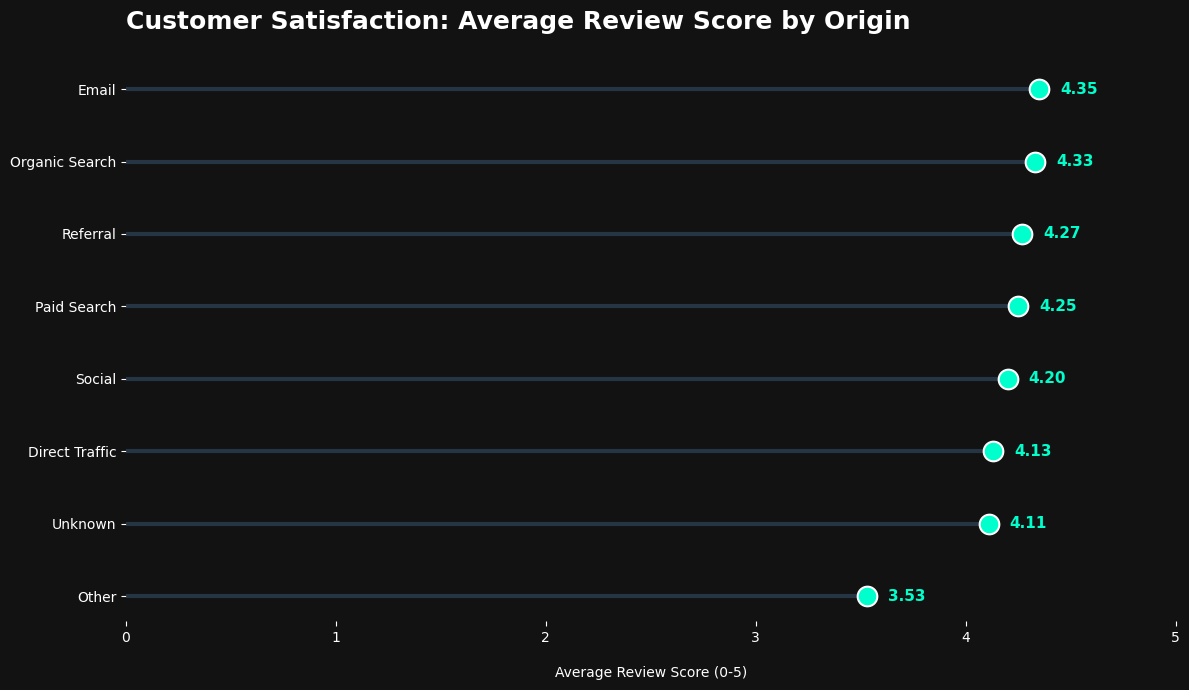

In [6]:
# --- 1. Prepare Data ---
review_data = {
    'origin': ['Email', 'Organic Search', 'Referral', 'Paid Search', 'Social', 'Direct Traffic', 'Unknown', 'Other'],
    'avg_score': [4.35, 4.33, 4.27, 4.25, 4.20, 4.13, 4.11, 3.53]
}
df_reviews = pd.DataFrame(review_data)

# Sort ascending so that the highest score (Email) ends up at the TOP of the chart
df_reviews = df_reviews.sort_values(by='avg_score', ascending=True)

# --- 2. Setup Plot ---
plt.figure(figsize=(12, 7), facecolor='#121212')
ax = plt.gca()
ax.set_facecolor('#121212')

# --- 3. Create Lollipop Chart ---
# The "stick"
plt.hlines(y=df_reviews['origin'], xmin=0, xmax=df_reviews['avg_score'], 
           color='#2b3e50', linewidth=3, alpha=0.8)

# The "candy" (the dot)
plt.scatter(df_reviews['avg_score'], df_reviews['origin'], 
            color='#00ffcc', s=200, edgecolor='white', linewidth=1.5, zorder=3)

# --- 4. Styling ---
plt.title("Customer Satisfaction: Average Review Score by Origin", 
          fontsize=18, fontweight='bold', color='white', pad=25, loc='left')

# Add score labels next to the dots
for i, score in enumerate(df_reviews['avg_score']):
    plt.text(score + 0.1, i, f'{score:.2f}', color='#00ffcc', 
             va='center', fontweight='bold', fontsize=11)

# Clean up axes
plt.xlim(0, 5) # Scores are out of 5
ax.set_xlabel("Average Review Score (0-5)", color='white', labelpad=15)
ax.tick_params(axis='both', colors='white')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()